In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat('ex6data1.mat')
X = mat['X']
y = mat['y']

In [3]:
X.shape

(51, 2)

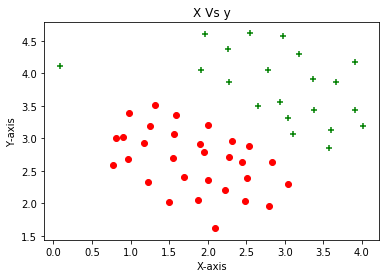

In [4]:
# Visualising data
pos, neg = (y==1).reshape(X.shape[0],1), (y==0).reshape(X.shape[0],1)
plt.scatter(X[pos[:,0],0], X[pos[:,0],1], marker='+', c='green')
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], marker='o', c='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('X Vs y')
plt.show()

In [5]:
# SVM Classifier
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X, y)
theta = classifier.class_weight_
y_pred = classifier.predict(X).reshape(51,1)

C:\Users\rajesh.malviya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
theta

array([1., 1.])

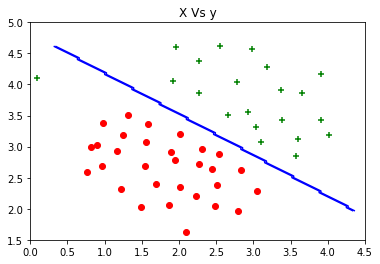

In [7]:
# Fitting SVC classifier on to data
pos, neg = (y==1).reshape(X.shape[0],1), (y==0).reshape(X.shape[0],1)
plt.scatter(X[pos[:,0],0], X[pos[:,0],1], marker='+', c='green')
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], marker='o', c='r')

# Plotting Decision Boundary
X_1, X_2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,1].max(), num=100), np.linspace(X[:1].min(), X[:,1].max(), num=100))
plt.contour(X_1, X_2, classifier.predict(np.array([np.ravel(X_1), np.ravel(X_2)]).T).reshape(X_1.shape), 1, colors = 'b')
plt.xlim(0, 4.5)
plt.ylim(1.5,5)
plt.title('X Vs y')
plt.show()

In [8]:
# when C is very large C=100
classifier = SVC(C = 100, kernel='linear')
classifier.fit(X, y)

C:\Users\rajesh.malviya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

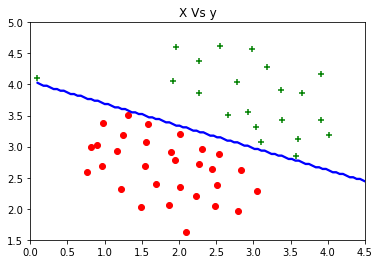

In [9]:
# Fitting SVC classifier on to data
pos, neg = (y==1).reshape(X.shape[0],1), (y==0).reshape(X.shape[0],1)
plt.scatter(X[pos[:,0],0], X[pos[:,0],1], marker='+', c='green')
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], marker='o', c='r')

# Plotting Decision Boundary
X_1, X_2 = np.meshgrid(np.linspace(X[:,0].min(), X[:,1].max(), num=100), np.linspace(X[:1].min(), X[:,1].max(), num=100))
plt.contour(X_1, X_2, classifier.predict(np.array([np.ravel(X_1), np.ravel(X_2)]).T).reshape(X_1.shape), 1, colors = 'b')
plt.xlim(0, 4.5)
plt.ylim(1.5,5)
plt.title('X Vs y')
plt.show()

In [10]:
# load the data
mat1 = loadmat('ex6data2.mat')
X2 = mat1['X']
y2 = mat1['y']

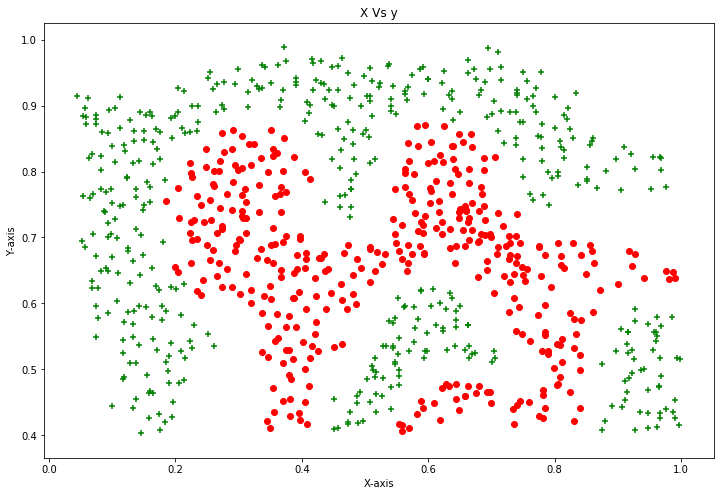

In [11]:
# Visualising data
plt.figure(figsize=(12,8))
m, n = X2.shape
pos2, neg2 = (y2==1).reshape(m,1), (y2==0).reshape(m,1)
plt.scatter(X2[pos2[:,0],0], X2[pos2[:,0],1], marker='+', c='green')
plt.scatter(X2[neg2[:,0],0], X2[neg2[:,0],1], marker='o', c='r')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('X Vs y')
plt.show()

In [12]:
# Gaussian Kernels
classifier2 = SVC(kernel='rbf', gamma=30)
classifier2.fit(X2, y2)

C:\Users\rajesh.malviya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

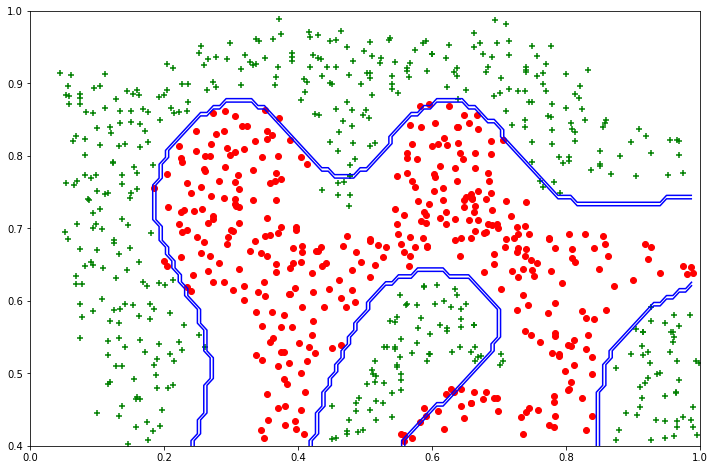

In [13]:
# Fitting SVC classifier2 on to data
plt.figure(figsize=(12,8))
m, n = X2.shape
pos2, neg2 = (y2==1).reshape(m,1), (y2==0).reshape(m,1)
plt.scatter(X2[pos2[:,0],0], X2[pos2[:,0],1], marker='+', c='green')
plt.scatter(X2[neg2[:,0],0], X2[neg2[:,0],1], marker='o', c='r')

# Plotting Decision Boun
X_3, X_4 = np.meshgrid(np.linspace(X2[:,0].min(), X2[:,1].max(), num=100), np.linspace(X2[:,0].min(), X2[:,1].max(), num=100))
plt.contour(X_3, X_4, classifier2.predict(np.array([X_3.ravel(), X_4.ravel()]).T).reshape(X_3.shape), 1, colors='b')
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.show()

In [14]:
mat3 = loadmat('ex6data3.mat')
X3 = mat3['X']
y3 = mat3['y']
Xval = mat3['Xval']
yval = mat3['yval']

In [15]:
# Optimize the Model to select best values of C and gamma
def hyperparameterTune(X, y, Xval, yval, values):
    
    acc = 0
    best_c = 0
    best_gamma = 0
    
    for i in values:
        c = i
        for j in values:
            g = 1/j
            classifier = SVC(C = c, gamma=g)
            classifier.fit(X, y.ravel())
            classifier.predict(Xval)
            score = classifier.score(Xval, yval)
            if score > acc:
                acc = score
                best_c = c
                best_gamma = g
                
    return best_c, best_gamma           
    

In [16]:
values = [0.01, 0.03,0.1,0.3,1,3,10,30]
c, gamma = hyperparameterTune(X3, y3, Xval, yval, values)
print('C: ',c,', gamma: ',gamma)

C:  0.3 , gamma:  100.0


In [17]:
classifier3 = SVC(C=0.3, gamma=100)
classifier3.fit(X3, y3.ravel())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

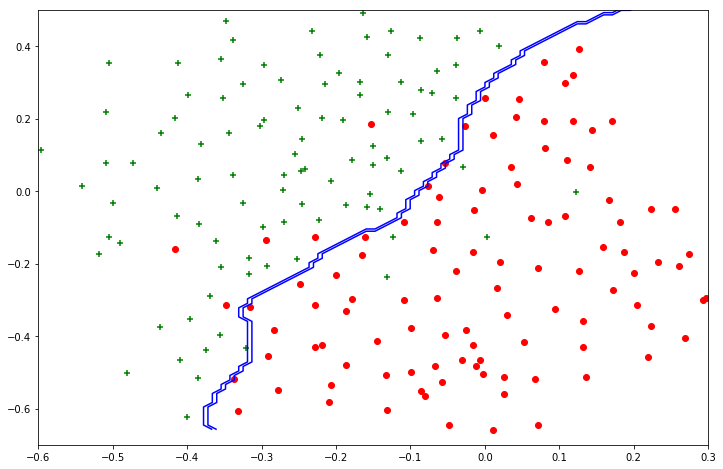

In [18]:
# Fitting SVC classifier2 on to data
plt.figure(figsize=(12,8))
m, n = X3.shape
pos3, neg3 = (y3==1).reshape(m,1), (y3==0).reshape(m,1)
plt.scatter(X3[pos3[:,0],0], X3[pos3[:,0],1], marker='+', c='green')
plt.scatter(X3[neg3[:,0],0], X3[neg3[:,0],1], marker='o', c='r')

# Plotting Decision Boun
X_5, X_6 = np.meshgrid(np.linspace(X3[:,0].min(), X3[:,1].max(), num=100), np.linspace(X3[:,1].min(), X3[:,1].max(), num=100))
plt.contour(X_5, X_6, classifier3.predict(np.array([X_5.ravel(), X_6.ravel()]).T).reshape(X_6.shape), 1, colors='b')
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)
plt.show()

In [19]:
# Spam Classification
import re
from nltk.stem import PorterStemmer

In [20]:
# Load the sample email and vocab
file_contents = open('emailSample1.txt', 'r').read()
vocab_list = open('vocab.txt', 'r').read()

In [21]:
vocablist_d = {}
vocab_list = vocab_list.split('\n')[:-1]

for ea in vocab_list:
    value, key = ea.split('\t')
    vocablist_d[key] = value

In [22]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n\n"

In [23]:
# Preproccessing the email
def emailPreproccessing(email_contents, vocablist_d):
    
    # Handle lower case
    email_contents = email_contents.lower()
    
    # handle numbers
    email_contents = re.sub('[0-9]+','number', email_contents)
    
    # Handle URL
    email_contents = re.sub('[http|https]://[^\s]*', 'httpsaddr', email_contents)
    
    # Handle Email Address
    email_contents = re.sub('[^\s]+@[^\s]', 'emailaddr', email_contents)
    
    # Handle $ sign
    email_contents = re.sub('[$]+','dollar', email_contents)
    
    # Handle special characters
    special_character = ['<','[',',','.',';','!','^','+',':','>','?']
    for cha in special_character:
        email_contents = email_contents.replace(str(cha),"")
    email_contents = email_contents.replace('\n', ' ')
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(' ')]
    email_contents = " ".join(email_contents)
    
    # Process the email and return the indices
    word_indices = []
    
    for char in email_contents.split():
        if len(char)>1 and char in vocablist_d:
            word_indices.append(int(vocablist_d[char]))
    
    return word_indices

In [24]:
word_indices = emailPreproccessing(file_contents, vocablist_d)

In [25]:
# Extract the email features
def extractEmailFeatures(word_indices, vocablist_d):
    
    n = len(vocablist_d)
    features = np.zeros((n,1))
    
    for w in word_indices:
        features[w] = 1
    
    return features

In [26]:
features = extractEmailFeatures(word_indices, vocablist_d)
print('NUmber of non-zero values: ',np.sum(features))

NUmber of non-zero values:  42.0


In [27]:
spam_mat = loadmat('spamTrain.mat')
X_train = spam_mat['X']
y_train = spam_mat['y']

In [38]:
C = 0.1
spam_classi = SVC(C=C, kernel='linear')
spam_classi.fit(X_train, y_train.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
print('Accuracy on training data ',spam_classi.score(X_train,y_train)*100,'%')

Accuracy on training data  99.825 %


In [40]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test =spam_mat_test["ytest"]
print('Accuracy on training data ',spam_classi.score(X_test,y_test)*100,'%')

Accuracy on training data  98.9 %


In [44]:
# top predictors for spam
weights = spam_classi.coef_
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1), weights.reshape(1899,1)))
df = pd.DataFrame(weights_col)

df.sort_values(by=[1], ascending=False, inplace=True)

predictors = []
idx = []
for i in df[0][:15]:
    for key, values in vocablist_d.items():
        if str(int(i)) == values:
            predictors.append(key)
            idx.append(int(values))
        

In [45]:
print("Top predictors of spam:")

for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
